<a href="https://colab.research.google.com/github/Aaka3021/Speech-Emotion-Recognition--1/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plotter(history):
  plt.figure()
  plt.plot(history.history['loss'],label='train loss')
  plt.plot(history.history['val_loss'],label='test loss')
  plt.xlabel('iterations')
  plt.ylabel('losses')
  plt.legend()
  plt.figure()
  plt.plot(history.history['accuracy'],label='train accuracy')
  plt.plot(history.history['val_accuracy'],label='test accuracy')
  plt.xlabel('iterations')
  plt.ylabel('accuracy')
  plt.legend()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Features = pd.read_csv('/content/drive/MyDrive/features_dataset.csv')
Features.head()
# Features.shape

Mounted at /content/drive


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,labels
0,0,0.272267,0.689451,0.708028,0.666473,0.715468,0.694820,0.627661,0.632560,0.687715,0.712157,0.706116,0.696561,0.666424,-505.009247,64.000099,-2.749660,16.950371,-1.089467,-2.046432,-7.829981,-8.716751,-19.273317,-5.294091,-5.584455,-5.783628,-1.870991,-7.146638,-3.675263,-0.451763,-11.253410,-3.521277,-3.482842,-5.802355,0.000036,0.000173,0.001309,0.018095,0.134511,0.229614,...,0.000877,0.001587,0.001460,0.001960,0.001981,0.002306,0.001958,0.002031,0.001465,0.001945,0.003857,0.003231,0.002353,0.003053,0.002795,0.002131,0.001839,0.001425,0.000817,0.000714,0.000658,0.001076,0.001073,0.001062,0.000639,0.000917,0.001054,0.001587,0.001744,0.001006,0.000687,0.000502,0.000372,0.000197,0.000137,0.000288,0.000349,0.000143,1.498768e-05,angry
1,1,0.262035,0.603476,0.668302,0.692199,0.709884,0.658301,0.605176,0.609343,0.640842,0.689348,0.702884,0.687124,0.663653,-626.262817,93.897247,-0.691273,17.833763,9.502007,2.030928,-2.721135,-8.514406,-12.427499,-6.575863,-0.015912,-2.750585,0.777975,-5.365466,-0.337154,1.482861,-8.703282,-2.764846,-1.618086,-1.523441,0.000006,0.000112,0.008725,0.090577,0.060794,0.002684,...,0.000047,0.000038,0.000055,0.000098,0.000262,0.000406,0.000398,0.000671,0.000650,0.000318,0.000125,0.000135,0.000105,0.000093,0.000109,0.000126,0.000105,0.000053,0.000051,0.000034,0.000027,0.000021,0.000018,0.000045,0.000044,0.000020,0.000010,0.000004,0.000004,0.000004,0.000009,0.000012,0.000028,0.000034,0.000036,0.000035,0.000032,0.000011,8.432723e-07,calm
2,2,0.195466,0.628032,0.687169,0.651985,0.621273,0.604192,0.640623,0.626136,0.652430,0.685134,0.653014,0.649654,0.632400,-535.881226,82.281357,-9.010551,20.842283,5.421832,-3.754339,-10.541499,-13.465772,-27.917681,-6.894572,-3.809465,-10.429282,0.157545,-7.953777,-6.011678,2.456674,-10.448029,-6.485257,-4.687830,-3.553447,0.000002,0.000024,0.000490,0.016251,0.110550,0.186236,...,0.000099,0.000113,0.000261,0.000204,0.000287,0.000270,0.000436,0.000757,0.000782,0.000723,0.000844,0.000456,0.000389,0.000483,0.000514,0.000573,0.000368,0.000192,0.000170,0.000132,0.000084,0.000055,0.000057,0.000076,0.000062,0.000061,0.000051,0.000046,0.000052,0.000076,0.000086,0.000107,0.000061,0.000052,0.000059,0.000095,0.000090,0.000031,2.326331e-06,sad
3,3,0.173769,0.720864,0.685492,0.655122,0.652557,0.587786,0.550012,0.638170,0.707171,0.648498,0.604207,0.638241,0.707306,-526.520569,84.466164,-6.822329,22.756920,8.021371,-0.836710,-6.375116,-13.950517,-15.801805,-1.701238,-3.240356,-2.120920,-1.001574,-5.576652,-0.277861,0.180505,-5.214784,-4.889361,-1.206443,2.497521,0.000392,0.000137,0.001436,0.052773,0.284222,0.078999,...,0.000138,0.000183,0.000524,0.000483,0.000608,0.000806,0.001164,0.001016,0.001356,0.000967,0.000642,0.000433,0.000357,0.000369,0.000310,0.000320,0.000237,0.000182,0.000108,0.000086,0.000088,0.000081,0.000059,0.000119,0.000216,0.000222,0.000176,0.000146,0.000119,0.000097,0.000064,0.000051,0.000074,0.000129,0.000198,0.000243,0.000190,0.000074,4.691918e-06,fear
4,4,0.207284,0.692981,0.737456,0.726056,0.685032,0.636497,0.568223,0.528898,0.598124,0.635435,0.643268,0.671737,0.665797,-591.298523,92.935883,-4.376369,22.136271,9.728477,-3.868228,-4.231765,-12.517565,-17.417633,-6.273466,-7.159021,-2.124696,-2.085358,-9.489192,-3.802913,-1.608241,-9.055273,-6.693238,-5.338201,-0.922801,0.000002,0.000040,0.001787,0.018344,0.063987,0.039720,...,0.000034,0.000046,0.000155,0.000217,0.000380,0.000631,0.000542,0.000424,0.000528,0.000116,0.000108,0.000090,0.000116,0.000120,0.000075,0.000052,0.000053,0.000021,0.000012,0.000009,0.000007,0.000007,0.000008,0.000009,0.000008,0.000008,0.000008,0.000004,0.000006,0.000010,0.000018,0.000014,0.000014,0.000005,0.000007,0.000011,0.000016,0.000008,4.218449e-07,sad


In [4]:
from sklearn.utils import shuffle
temp = shuffle(Features)

In [5]:
df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df]

In [6]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [7]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [8]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(1142, 162) (298, 162)
(1142, 8) (298, 8)


In [9]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [10]:
print(x_testcnn.shape)
print(x_traincnn.shape)

(298, 162, 1)
(1142, 162, 1)


In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, Flatten

model = Sequential()
model.add(LSTM(X_train.shape[1], return_sequences=True, dropout=0.1, input_shape=( X_train.shape[1], 1 ),recurrent_dropout=0.2))
model.add(LSTM(X_train.shape[1]*2, dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(LSTM(X_train.shape[1], dropout=0.1, recurrent_dropout=0.2, return_sequences=True))
model.add(Flatten())
#model.add(Dense(n_dim, activation='relu'))  
#model.add(Dropout=0.4)
model.add(Dense(y_train.shape[1], activation='softmax'))
              
# model compilation  
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])  

In [17]:
history=model.fit(x_traincnn, y_train, batch_size=256, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
5/5 [==============================] - 36s 2s/step - loss: 2.5038 - accuracy: 0.1346 - val_loss: 1.9177 - val_accuracy: 0.2718
Epoch 2/1000
5/5 [==============================] - 9s 2s/step - loss: 1.8890 - accuracy: 0.2541 - val_loss: 1.8419 - val_accuracy: 0.2819
Epoch 3/1000
5/5 [==============================] - 9s 2s/step - loss: 1.8366 - accuracy: 0.2519 - val_loss: 1.8479 - val_accuracy: 0.2785
Epoch 4/1000
5/5 [==============================] - 9s 2s/step - loss: 1.8312 - accuracy: 0.2732 - val_loss: 1.9594 - val_accuracy: 0.1443
Epoch 5/1000
5/5 [==============================] - 9s 2s/step - loss: 1.8856 - accuracy: 0.2280 - val_loss: 1.8696 - val_accuracy: 0.2483
Epoch 6/1000
5/5 [==============================] - 9s 2s/step - loss: 1.8356 - accuracy: 0.2557 - val_loss: 1.9284 - val_accuracy: 0.2450
Epoch 7/1000
5/5 [==============================] - 9s 2s/step - loss: 1.8250 - accuracy: 0.2569 - val_loss: 1.8547 - val_accuracy: 0.2785
Epoch 8/1000
5/5 [========

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 162, 162)          106272    
_________________________________________________________________
lstm_10 (LSTM)               (None, 162, 324)          631152    
_________________________________________________________________
lstm_11 (LSTM)               (None, 162, 162)          315576    
_________________________________________________________________
flatten_1 (Flatten)          (None, 26244)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 209960    
Total params: 1,262,960
Trainable params: 1,262,960
Non-trainable params: 0
_________________________________________________________________
10/10 [==============================] - 1s 117ms/step - loss: 3.1240 - accuracy: 0.5805
[3.1239500045776367, 

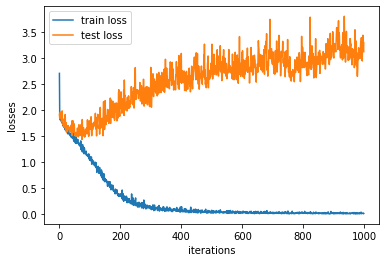

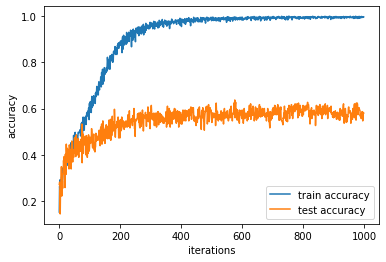

In [19]:
plotter(history)

model.summary()
result = model.evaluate(x_testcnn,y_test)
print(result)